(-0.5, 1523.5, 2031.5, -0.5)

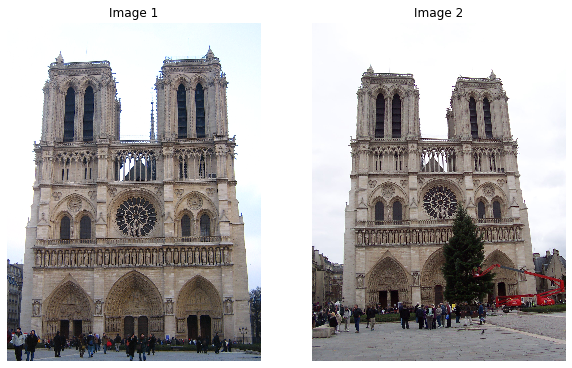

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plotFigureGray, plotFigure
from student_code import harris_corners, get_keypoints

img1 = cv2.imread('../data/notre_dame1.jpg')
img2 = cv2.imread('../data/notre_dame2.jpg')
gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray1 = np.float32(gray1)
gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray2 = np.float32(gray2)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img1[:,:,::-1])#,cmap='gray')
plt.title("Image 1")
plt.axis('off')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img2[:,:,::-1])#,cmap='gray')
plt.title("Image 2")
plt.axis('off')
#plt.show()


In [2]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1_gray_blur = cv2.GaussianBlur(img1_gray,(5,5),0)
#img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
Ix_ = cv2.Sobel(img1_gray_blur,cv2.CV_64F,1,0,ksize=3)
Iy_ = cv2.Sobel(img1_gray_blur,cv2.CV_64F,0,1,ksize=3)  
Ixy_ = Ix_*Iy_ #cv2.Sobel(img1_gray_blur,cv2.CV_64F,1,1,ksize=3) 
Ix = cv2.GaussianBlur(Ix_,(5,5),cv2.BORDER_DEFAULT) 
Ix2 = Ix * Ix
Iy = cv2.GaussianBlur(Iy_,(5,5),cv2.BORDER_DEFAULT) 
Iy2 = Iy * Iy
Ixy = cv2.GaussianBlur(Ixy_,(5,5),cv2.BORDER_DEFAULT) 

(-0.5, 1535.5, 2047.5, -0.5)

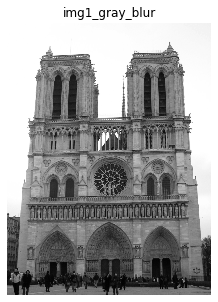

In [3]:
#img1_gray_blur
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img1_gray_blur,cmap='gray')
plt.title("img1_gray_blur")
plt.axis('off')

(-0.5, 1535.5, 2047.5, -0.5)

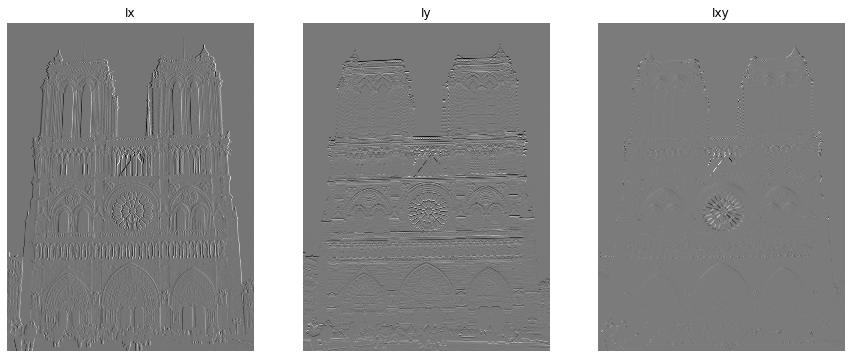

In [4]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(Ix,cmap='gray')
plt.title("Ix")
plt.axis('off')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(Iy,cmap='gray')
plt.title("Iy")
plt.axis('off')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(Ixy,cmap='gray')
plt.title("Ixy")
plt.axis('off')

In [5]:
height = img1.shape[0]
width = img1.shape[1]
window_size = 5
corners = []
image2 = img1.copy()
color_img = image2#cv2.cvtColor(image2,cv2.COLOR_GRAY2RGB)
padding = int(window_size/2)
threshold = 10**8
alpha = 0.04
max = 0
total_r = 0
count_r = 0
wc = 0 # wild card
Response_mat = np.full((height,width), 0,  dtype=np.float)
NMS_mat = np.full((height,width), 0,  dtype=np.float)
for y in range(padding,height-padding):
    for x in range(padding,width-padding):
        windowIx2 = Ix2[y-padding:y+padding+1, x-padding:x+padding+1]
        windowIxy = Ixy[y-padding:y+padding+1, x-padding:x+padding+1]
        windowIy2 = Iy2[y-padding:y+padding+1, x-padding:x+padding+1]
        Sx2 = windowIx2.sum()
        Sxy = windowIxy.sum()
        Sy2 = windowIy2.sum()
        # response function
        det = (Sx2 * Sy2) - (Sxy ** 2)
        trace = Sx2 + Sy2
        r = det - alpha*(trace**2)

        #color if greater than threshold

        if r>threshold:
            Response_mat[y][x] = 255
        else:
            Response_mat[y][x] = 0

        """
        corners.append([x,y,r])
        color_img.itemset((y, x, 0), 0)
        color_img.itemset((y, x, 1), 0)
        color_img.itemset((y, x, 2), 255)
        """
    # print("max r = ",max)
    # mean_r = total_r/count_r
    # print(mean_r)
    # print(wc)


In [6]:
# copy the Response mat
Backup_response = Response_mat.copy()    

(-0.5, 1535.5, 2047.5, -0.5)

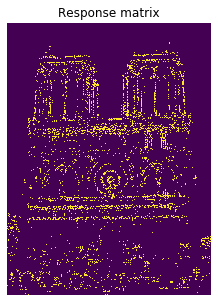

In [7]:
#img1_gray_blur
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(Backup_response)#,cmap='gray')
plt.title("Response matrix")
plt.axis('off')

In [8]:
#performing NMS
corners = []
for y in range(5,height-5):
    for x in range(5,width-5):
        # perform NMS
        if Response_mat[y][x]==255:
            Response_mat[y-5:y+5,x-5:x+5]=0
            Response_mat[y][x]=255
            corners.append([x,y])
        x=x+10
    y=y+10

(-0.5, 1535.5, 2047.5, -0.5)

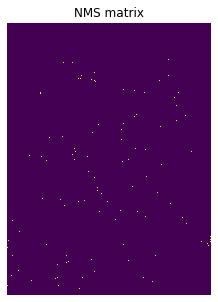

In [9]:
#img1_gray_blur
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(Response_mat)#,cmap='gray')
plt.title("NMS matrix")
plt.axis('off')

In [10]:
#corners